In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
job_record = pd.read_csv('../data/fullsample.csv')

job_record.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [3]:
job_record['BEGIN'] = pd.to_datetime(job_record['BEGIN'],
                                     infer_datetime_format = True,
                                    errors = 'coerce')

In [4]:
job_record['END'] = pd.to_datetime(job_record['END'],
                                     infer_datetime_format = True,
                                    errors = 'coerce')

In [5]:
job_record.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395885 entries, 0 to 7395884
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   JOBID      7395885 non-null  object        
 1   STATE      7395885 non-null  object        
 2   BEGIN      7395442 non-null  datetime64[ns]
 3   END        7395234 non-null  datetime64[ns]
 4   REQMEM     7395885 non-null  object        
 5   USEDMEM    7395885 non-null  object        
 6   REQTIME    7395885 non-null  object        
 7   USEDTIME   7395885 non-null  object        
 8   NODES      7395885 non-null  int64         
 9   CPUS       7395885 non-null  int64         
 10  PARTITION  7395885 non-null  object        
 11  EXITCODE   7395885 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 677.1+ MB


In [6]:
job_record['PARTITION'].value_counts()

production              7019578
nogpfs                   147229
pascal                   124453
sam                       64967
turing                    21424
maxwell                   11278
cgw-maizie                 4309
debug                      1616
cgw-platypus                379
cgw-dsi-gw                  228
cgw-capra1                  157
cgw-dougherty1              125
cgw-horus                    61
cgw-cqs1                     28
cgw-hanuman                  21
cgw-sideshowbob              14
cgw-vm-qa-flatearth1          9
cgw-tbi01                     8
cgw-rocksteady                1
Name: PARTITION, dtype: int64

In [7]:
job_record['EXITCODE'].value_counts()

0:0      7384480
1:0         4958
0:15        1887
0:125       1739
0:9         1361
2:0          508
0:7          389
121:0         89
127:0         88
13:0          68
24:0          67
0:11          35
38:0          32
28:0          29
6:0           27
126:0         24
0:6           18
0:2           16
7:0           12
29:0          12
16:0           9
59:0           8
9:0            4
0:40           4
8:0            3
125:0          3
0:105          2
76:0           1
85:0           1
0:12           1
30:0           1
0:98           1
43:0           1
3:0            1
67:0           1
4:0            1
11:0           1
0:8            1
103:0          1
116:0          1
Name: EXITCODE, dtype: int64

In [8]:
completed = job_record[job_record['STATE'] == 'COMPLETED']

completed.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0


In [24]:
completed = completed.sort_values('END')
completed['jobs_per_day'] = (completed
                               .rolling('1d', on = 'END')['JOBID']
                               .count())

completed.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,jobs_per_hour,jobs_per_day
6640577,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0,1.0,1.0
6640635,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0,2.0,2.0
6640627,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0,3.0,3.0
6640651,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0,4.0,4.0
6640654,24460671,COMPLETED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024Mc,636.96M,00:30:00,00:00:45,1,1,production,0:0,5.0,5.0


In [13]:
completed["jobs_per_hour"].describe().apply(lambda x: format(x, 'f'))

count    7375084.000000
mean        2316.600285
std         2737.487903
min            1.000000
25%          625.000000
50%         1249.000000
75%         2741.000000
max        16177.000000
Name: jobs_per_hour, dtype: object

In [28]:
completed["jobs_per_day"].describe().apply(lambda x: format(x, 'f'))

count    7375084.000000
mean       30072.404841
std        22264.435602
min            1.000000
25%        15332.000000
50%        23375.000000
75%        37151.000000
max       129246.000000
Name: jobs_per_day, dtype: object

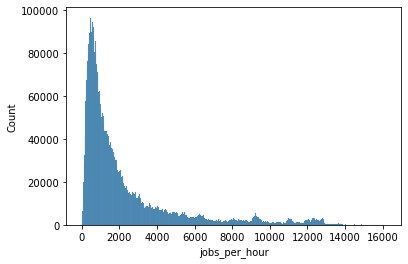

In [31]:
sns.histplot(data = completed['jobs_per_hour']);

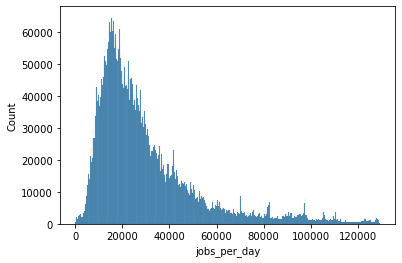

In [94]:
sns.histplot(data = completed['jobs_per_day']);